# **The Pima Indians Diabetes Dataset**

# Step 1: Answering the question

## Loading the Dataset

In [ ]:
# Get the dataset by raw URL
!wget https://github.com/hazmash5/ds-projects/raw/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv

--2021-02-08 12:14:03--  https://github.com/hazmash5/ds-projects/raw/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hazmash5/ds-projects/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv [following]
--2021-02-08 12:14:03--  https://raw.githubusercontent.com/hazmash5/ds-projects/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0s      

2021-02-08 12:14:04 (80.

In [ ]:
# Create new folder and name it data
!mkdir data

In [ ]:
# Moving our datasets to the data folder
!mv pima-indians-diabetes.csv data/

In [ ]:
# Showing the first line of the dataset
!head -n 3 data/pima-indians-diabetes.csv

6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


We can notes the following:
1.	There is no header row so `header= None` must be used while we read the csv.
2.	There is no need to use `Sep parameter` because the separation between the values is (,) as the default separation of Panda csv Sep.


In [ ]:
# Showing the number of lines.
!cat data/pima-indians-diabetes.csv | wc -l

767


We have 768 of instances

## Introduction
The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within five years in Pima Indians given medical details. It is a binary (2-class) classification problem. 
	Several familiar types of classification models algorithms utilized:
1.	To choose the best classification algorithms and efficiently perform another appropriate comparison between the same algorithms.
2.	To compare the utilized feature engineering and pre-processing methods.
3.	To get a broad range of choices.

>Utilized classification models are respectively:
1.	Logistic Regression
2.	Linear Discriminant Analysis
3.	K Neighbors Classifier
4.	Decision Tree Classifier
5.	Gaussian NB
6.	Support Vector Classifier
7.	XGBoost Classifier



## Required libraries
This notebook uses several Python packages that come standard with the Google Colaboratory. The primary libraries that we'll be operating are respectively:
*	**NumPy**: Provides a fast numerical array structure and helper functions.
*	**Pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
*	**Scikit-learn**: The essential Machine Learning package in Python.
*	**XGBoost**: Optimized distributed gradient boosting library designed to be highly efficient, flexible and portable matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
*	**Seaborn**: Advanced statistical plotting library.
*	**watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))

## The problem domain
Our company just got funded to create a smartphone app that automatically female diabetes detection to use in remote villages in India, from simple devices for each test attribute and fill it in the smartphone, we will be building part of the data analysis pipeline for this app.
We tasked by the Head of Data Science to create a machine learning model, the model takes eight attributes from the user and detects diabetes based on those attributes alone.
We got a dataset from the field researchers to develop the model, which includes predicting the onset of diabetes within five years in Pima-Indians given medical details. With the following attributes:
*	Number of times pregnant.
*	Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
*	Diastolic blood pressure (mm Hg).
*	Triceps skinfold thickness (mm).
*	2-Hour serum insulin (mu U/ml).
*	Body mass index (weight kg / height m2).
*	Diabetes pedigree function.
*	Age (years).
*	Class variable (0 or 1).


## Data analysis checklist:
The data analysis checklist:
1.	**Specify the type of data analytic question (e.g. exploration, association causality) before touching the data**: We are trying to detect female diabetes tests (Positive test or Negative test) based on eight continuous attributes.
2.	**Define the metric for success before beginning:** We will use the accuracy to quantify how well our model is performing. they told us that we should achieve at least 77% accuracy.


# Step 2: EDA Exploratory Data Analysis 

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df

,preg,plas,pres_mm,skin_mm,insu,BMI,DPF,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Check duplicated rows
print('The number of repeated rows= ',
      df.duplicated(keep='last').sum() )


The number of repeated rows=  0


There is no duplicated rows

In [ ]:
print('The number of null values= ',
      df.isnull().sum().sum())

The number of null values=  0


There is no `NaN` values.

## **1.** Using pie plot
By using a pie plot to visualize and compute the difference between the categories, we can perceive the notable difference between the numbers of categories. A balance issue must be considered.

In [ ]:
color= ['#9999ff','#ff4d4d']

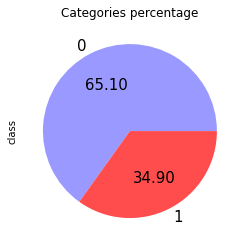

In [ ]:
pd.value_counts(df['class']).plot(kind='pie',
                                  autopct='%.2f',fontsize=15,
                                  colors= color,
                                  title='Categories percentage')

By using pie plot to visualize and compute the difference between the categories; we can notes the big difference between numbers of categories. There is an unbalance issue must be considered.

## **2.** Using box plot
By using a box plot to receive an indication of how the values in the data are spread out, and to visualize the distribution of values within each attribute, we can notes the following:
1. All attributes values spread between 0 and 200 except insulin values,
2. The variance of values is extremely, so we must utilize preprocessing methods before training.

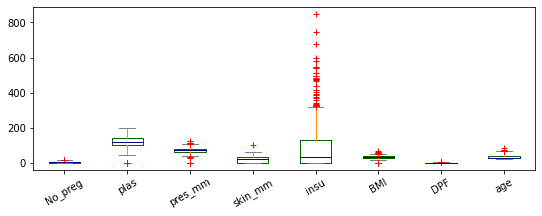

In [ ]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df[df.columns[:-1]].plot(kind='box', color=color, sym='r+', figsize=(9,3), rot=30)


## **3.** Using Andrews curves
By exploiting Andrew’s curves plot to visualize data clustering for each class, we can notes:
1.	Curves belonging to samples of a similar class aren't closer together. 
2.	The curves of the two classes mix together and don’t define structures. 
3.	It is problematic to target those classes, add features must be considered. 


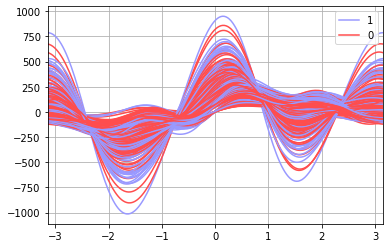

In [ ]:
pd.plotting.andrews_curves(df, 'class', color=color)

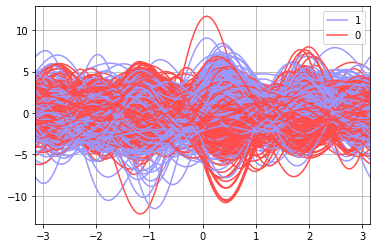

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf['class']= all_labels
pd.plotting.andrews_curves(ddf, 'class', color=color)

## **4.** Using Parallel coordinates plot
By using Parallel coordinates plot to comparing variables together and observing the relationships between them, we can notes that there are no significant phenomena for each class, between the attributes. 

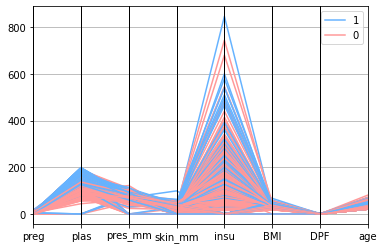

In [ ]:
pd.plotting.parallel_coordinates(df, 'class', color=['#66b3ff','#ff9999'])

In [ ]:
df.columns

Index(['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age',
       'class'],
      dtype='object')

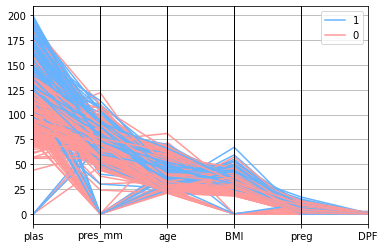

In [ ]:
pd.plotting.parallel_coordinates(df[['plas', 'pres_mm','age','BMI', 'preg','DPF', 'class']], 'class', color=['#66b3ff','#ff9999'])

## **5.** Using Radviz Plot
By using Radviz plotting to recognize clustering attribute for each class, we can notes the following:
1. Classes are clustering to the same attributes.
2. There are outlier instances, so outlier detection methods must be used.
3. Some attributes do not affect the categories, so feature selection methods must be used.

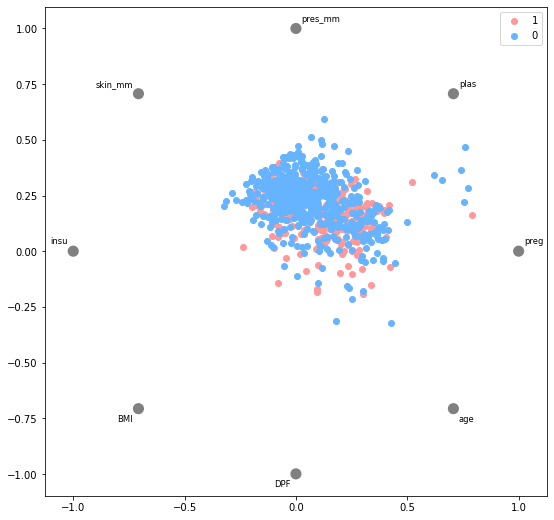

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf.columns= df.columns[0:-1]
plt.figure(figsize=(9, 9))
ddf['class']= all_labels
pd.plotting.radviz(ddf, 'class', color=['#ff9999','#66b3ff'], )


There is no clear recognize distinguished cluster for each class to attributes as we saw in the previous figures.
We can see a lot of outliers corresponding to the negative tests class.

## **6.** Using hist plot
By using histogram plots we can visualize mean, median, standard deviation, and mode for the values of the attributes.

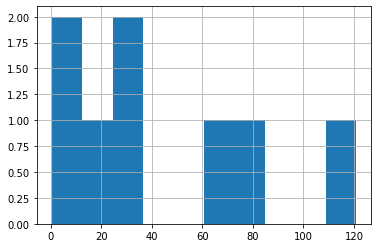

In [ ]:
df.describe().T['mean'].hist()

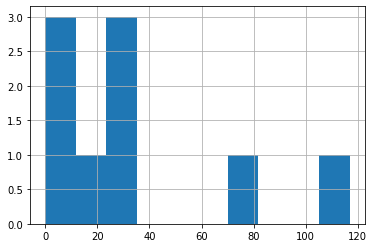

In [ ]:
df.median().hist()

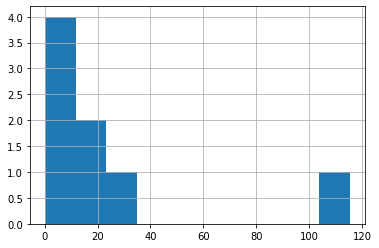

In [ ]:
df.describe().T['std'].hist()

The mode is the most frequent observation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc13f538ef0>,
      dtype=object)

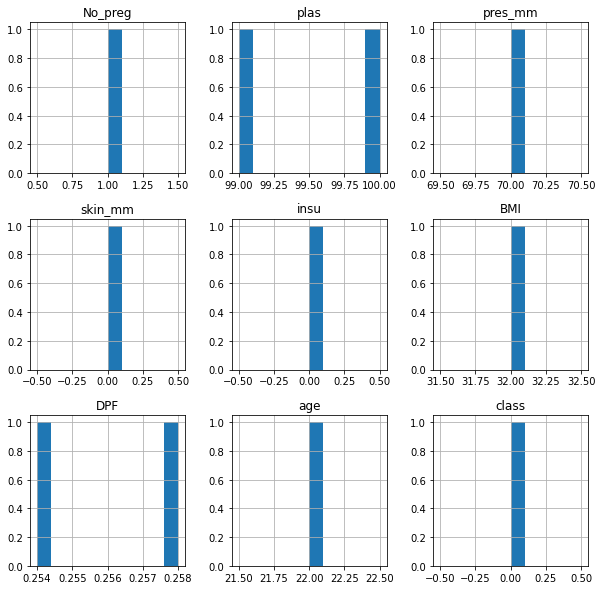

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.mode().hist(ax=ax)

## **7.** Using Violin plot
By using violin plot to shows the distribution of quantitative data across several levels of categorical variables such that those distributions can be compared and features a kernel density estimation of the underlying distribution we can notes

1. Many zeros values.
2. The mean values for each class are different, so we must consider this when imputing Nan values.
3. There are outlier values. 

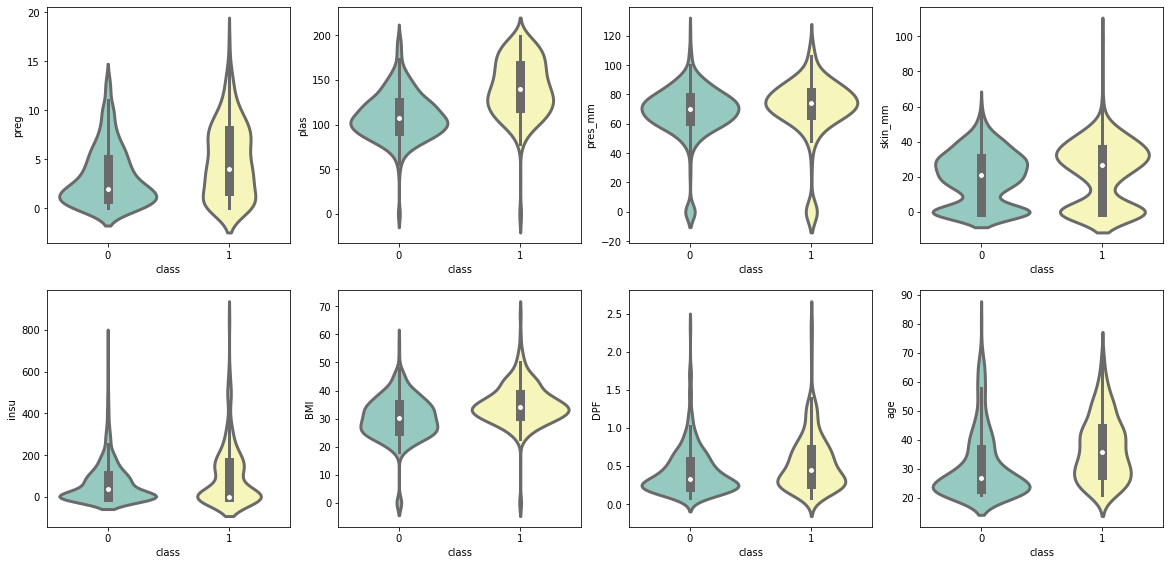

In [ ]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(df):
    if column == 'class':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.violinplot(x='class', y=column, data=df, inner="box", palette="Set3", cut=2, linewidth=3)

>After talking with the field researchers, they fill the null values with zero so we must replace all not logical zeros values with NaN values.

## **8.** Using Pair and KDE _Kernel Density Estimate_ Plot
By using Pair and KDE plot to visualize distribution of single variables and relationships between variables we can notes
1.	Relationships between some attribute,
2.	A lot of zeros also,
3.	Probability distributions are  close and same.


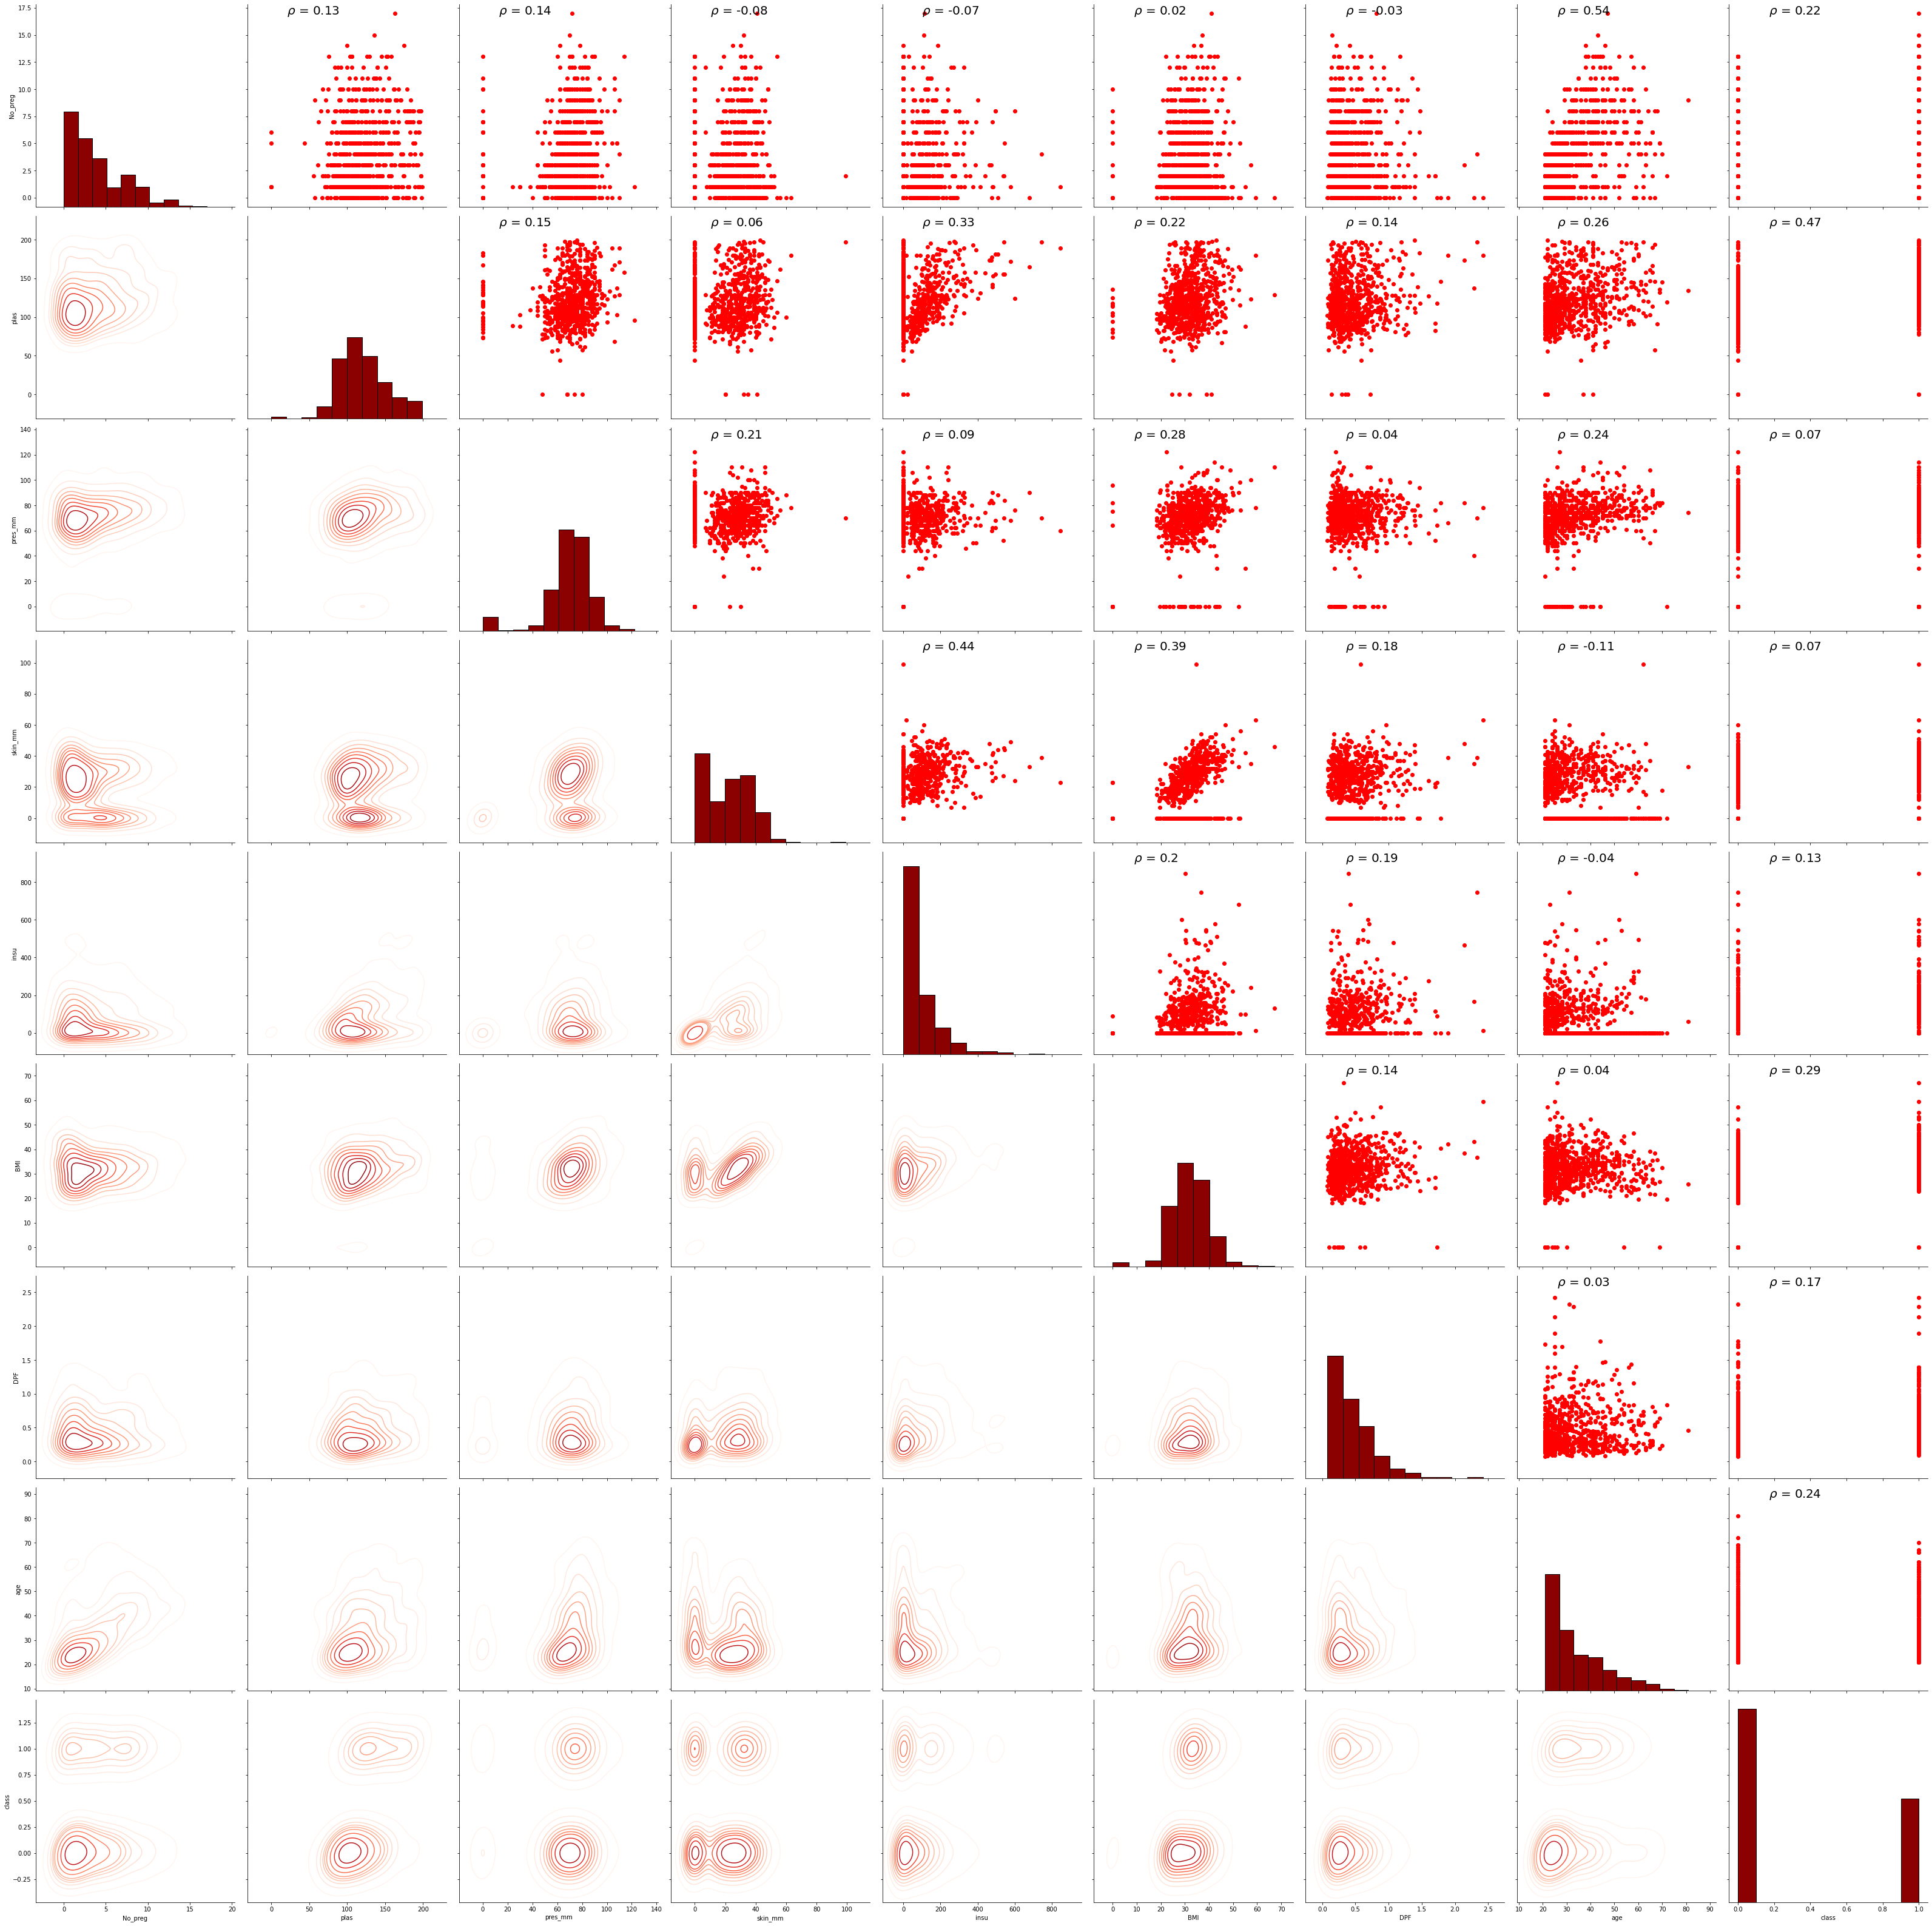

In [ ]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sb.PairGrid(data= df,
                    vars = ['No_preg', 'plas', 'pres_mm', 'skin_mm',
                            'insu', 'BMI', 'DPF', 'age', 'class'], height = 5)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'red')
grid = grid.map_upper(corr)
grid = grid.map_lower(sb.kdeplot, cmap = 'Reds',)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');


## **9.** Using the Correlation Matrix Heat map
 By using the Correlation Matrix Heat map (figure 2.9) to illustrate the relationship between variables, we can note no significant case of multicollinearity is observed because all of the correlation coefficients are less than 0.7.

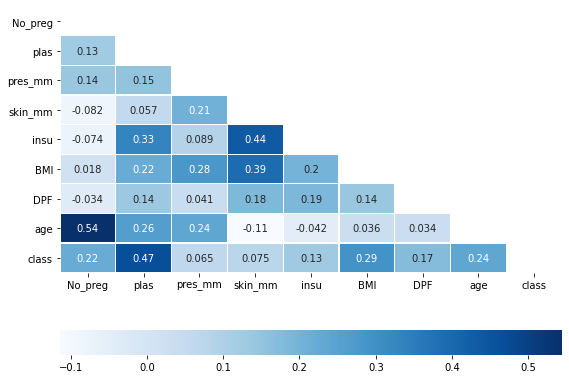

In [ ]:
plt.figure(figsize=(9, 7))
matrix = np.triu(df.corr())
corrMatrix = df.corr()
sb.heatmap(corrMatrix, annot=True, cmap='Blues', linewidths=0.15,
           mask=matrix, cbar_kws= {'orientation': 'horizontal'})
plt.show()

# Step 3: Tidying the data


# **1.** Fill NaN Methods Comparison

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']

In [ ]:
df.columns

Index(['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age',
       'class'],
      dtype='object')

In [ ]:
(df['age']==0).sum()

0

In [ ]:
print('''Columns coud'nt be zero are: ''' , list(df.columns[1:6]))

Columns coud'nt be zero are:  ['plas', 'pres_mm', 'skin_mm', 'insu', 'BMI']


In [ ]:
# Redefining zeros into NaN values
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

In [ ]:
df[df.columns[1:6]].isnull().sum()

plas         5
pres_mm     35
skin_mm    227
insu       374
BMI         11
dtype: int64

I will compare between 5 technique to fill NaN values

## **1.** Remove Rows With Missing Values

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

In [ ]:
df.dropna(inplace=True)
df.shape

(392, 9)

In [ ]:
print('Percentage of dropped data=', (768-392)/768)

Percentage of dropped data= 0.4895833333333333


In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels,
                                                      test_size=0.25, random_state=1,)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy' )
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

(392, 8)
LR, 0.7861904761904762, 0.12857054673418924))
LDA, 0.7897619047619047, 0.12802595931491162))
KNN, 0.7623809523809524, 0.11292744444886092))
CART, 0.6897619047619046, 0.1308464939868934))
NB, 0.7797619047619049, 0.11212111810322156))
SVM, 0.7554761904761904, 0.11571795996518176))
XGB, 0.7816666666666667, 0.11272018010217857))


## **2.** Impute Missing Values (Mean Value Filling)

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [ ]:
df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, 
                                                      test_size=0.25, random_state=1,                                                   )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LR, 0.7738300492610837, 0.0689196220881071))
LDA, 0.7737684729064039, 0.07106786364748625))
KNN, 0.8173645320197045, 0.07886207573510806))
CART, 0.8796798029556652, 0.06851110409920169))
NB, 0.7720443349753694, 0.0700920699840484))
SVM, 0.8349137931034484, 0.06586019332396725))
XGB, 0.8869458128078817, 0.05642168499262387))


## **3.**  Impute Missing Values (Median Value Filling)


In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [ ]:
df1.fillna(df1.median(), inplace=True)
df2.fillna(df2.median(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels,
                                                     test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

LR, 0.7633004926108373, 0.07843541820685897))
LDA, 0.7703817733990148, 0.07992931047044209))
KNN, 0.8070812807881772, 0.07939031074825631))
CART, 0.8729064039408868, 0.048698449505117515))
NB, 0.7598522167487685, 0.08545857474403694))
SVM, 0.8504926108374384, 0.05873674193644676))
XGB, 0.888793103448276, 0.06942809765514414))


## **4.**  Using back Filling


In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [ ]:
df1.fillna(method= 'backfill', inplace=True)
df2.fillna(method= 'backfill', inplace=True)

df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels,
                                                      test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

LR, 0.7668103448275861, 0.08091636753181289))
LDA, 0.7652709359605911, 0.07755140356317015))
KNN, 0.7690270935960591, 0.0745836590047773))
CART, 0.7551724137931034, 0.07015987262294252))
NB, 0.7598522167487685, 0.07873013142757428))
SVM, 0.7686576354679804, 0.08000877623455863))
XGB, 0.7896551724137931, 0.07607369241829157))


## **5.**  Using forward Filling


In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [ ]:
df1.fillna(method= 'ffill', inplace=True)
df2.fillna(method= 'ffill', inplace=True)

df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels,
                                                      test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

LR, 0.7652093596059113, 0.07235394610657282))
LDA, 0.7669334975369458, 0.07328349403480619))
KNN, 0.7568965517241378, 0.0940046500259637))
CART, 0.7362068965517241, 0.053470972003503356))
NB, 0.7461206896551724, 0.06380840654648952))
SVM, 0.7600985221674877, 0.06766521362701008))
XGB, 0.7846059113300492, 0.05681452407049272))


## Classification Comparison of Fill NaN Methods

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'XGB']

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
values= ['Acc', 'SD']

In [ ]:
Fill_NaN_Methods=['1_Remove', '2_Mean_fill','3_Median_fill',
     '4_Back_fill', '5_Forwd_fill']

In [ ]:
idx = pd.MultiIndex.from_product([Fill_NaN_Methods, values],
                                 names=['Fill_NaN_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

Fill_NaN_Methods 1_Remove        2_Mean_fill  ... 4_Back_fill 5_Forwd_fill       
values                Acc     SD         Acc  ...          SD          Acc     SD
LR                  0.786  0.132       0.774  ...       0.083        0.765  0.074
LDA                 0.790  0.131       0.774  ...       0.080        0.767  0.075
KNN                 0.762  0.116       0.817  ...       0.077        0.757  0.096
CART                0.690  0.134       0.880  ...       0.072        0.736  0.055
NB                  0.780  0.115       0.772  ...       0.081        0.746  0.065
SVM                 0.755  0.119       0.835  ...       0.082        0.760  0.069
XGB                 0.782  0.116       0.887  ...       0.078        0.785  0.058

[7 rows x 10 columns]

In [ ]:
classification_comparison.to_csv('Classification Comparison of Fill_NaN_Methods.csv', index= False)

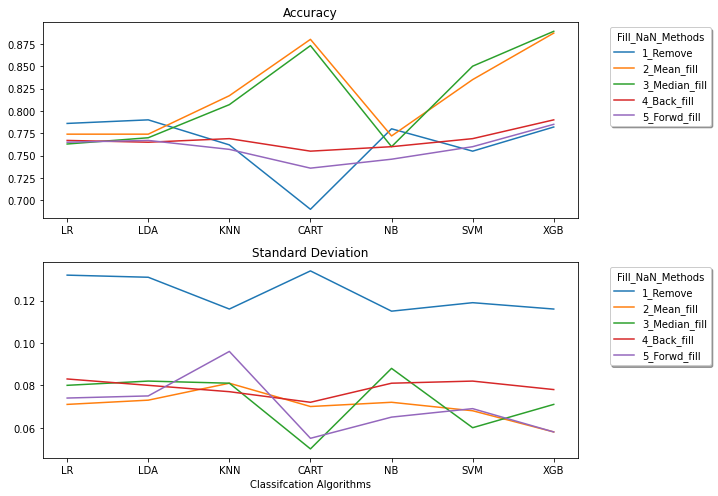

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='Fill_NaN_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='Fill_NaN_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
#classification_comparison= classification_comparison.drop('1_Remove', axis=1, level=0)

In [ ]:
classification_comparison.T.max()

LR      0.786
LDA     0.790
KNN     0.817
CART    0.880
NB      0.780
SVM     0.850
XGB     0.889
dtype: float64

In [ ]:
FIll_NaN= classification_comparison.T.max()

In [ ]:
classification_comparison.T['CART']

Fill_NaN_Methods  values
1_Remove          Acc       0.690
                  SD        0.134
2_Mean_fill       Acc       0.880
                  SD        0.070
3_Median_fill     Acc       0.873
                  SD        0.050
4_Back_fill       Acc       0.755
                  SD        0.072
5_Forwd_fill      Acc       0.736
                  SD        0.055
Name: CART, dtype: float64

In [ ]:
classification_comparison.T['XGB']

Fill_NaN_Methods  values
1_Remove          Acc       0.782
                  SD        0.116
2_Mean_fill       Acc       0.887
                  SD        0.058
3_Median_fill     Acc       0.889
                  SD        0.071
4_Back_fill       Acc       0.790
                  SD        0.078
5_Forwd_fill      Acc       0.785
                  SD        0.058
Name: XGB, dtype: float64

In [ ]:
methods_comparison= pd.DataFrame(FIll_NaN, columns=['FIll_NaN'])
methods_comparison

,FIll_NaN
LR,0.786
LDA,0.790
KNN,0.817
CART,0.880
NB,0.780
SVM,0.850
XGB,0.889


# Selected Fill NaN Methods

The best fill NaN method is **Median_fill**

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [ ]:
df1.fillna(df1.median(), inplace=True)
df2.fillna(df2.median(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)

# **2.** Add features

## **1.** Add features based on BMI classification table


**BMI classification table**  
- BMI		CLASSIFICATION
- **>** 30		:Obese
- 25-30		:Overweight
- 20-25		:Healthy weight range
- 20-18		:Underweight
- <18		  :Very Underweight


In [ ]:
Obese= []
for i in df['BMI']:
  Obese.append(1 if i>30 else 0)
pd.value_counts(Obese)

1    476
0    292
dtype: int64

In [ ]:
df['Obese']= Obese

In [ ]:
Overweight= []
for i in df['BMI']:
  Overweight.append(1 if 30>i>25 else 0)
pd.value_counts(Overweight)

0    595
1    173
dtype: int64

In [ ]:
df['Overweight']= Overweight

In [ ]:
Healthy_weight= []
for i in df['BMI']:
  Healthy_weight.append(1 if 25>i>20 else 0)
pd.value_counts(Healthy_weight)

0    676
1     92
dtype: int64

In [ ]:
df['Healthy_weight']= Healthy_weight

In [ ]:
Underweight= []
for i in df['BMI']:
  Underweight.append(1 if 20>i>18 else 0)
pd.value_counts(Underweight)

0    755
1     13
dtype: int64

In [ ]:
df['Underweight']= Underweight

In [ ]:
Very_Underweight= []
for i in df['BMI']:
  Very_Underweight.append(1 if i<18 else 0)
pd.value_counts(Very_Underweight)

0    768
dtype: int64

In [ ]:
#df['Very_Underweight']= Very_Underweight

## **2.** Add features based on 2-Hour serum insulin


**2-Hour serum insulin classification table**  
- insulin		CLASSIFICATION
- **>**140		:Normal
- 140-199		:pre-diabetic
- < 199		:diabetic

In [ ]:
Normal= []
for i in df['insu']:
  Normal.append(1 if i<140 else 0)
pd.value_counts(Normal)

1    457
0    311
dtype: int64

In [ ]:
df['Normal']= Normal

In [ ]:
pre_diabetic= []
for i in df['insu']:
  pre_diabetic.append(1 if 199>i>140 else 0)
pd.value_counts(pre_diabetic)

0    693
1     75
dtype: int64

In [ ]:
df['pre_diabetic']= pre_diabetic

In [ ]:
diabetic= []
for i in df['insu']:
  diabetic.append(1 if i>199 else 0)
pd.value_counts(diabetic)

0    541
1    227
dtype: int64

In [ ]:
df['diabetic']= diabetic

## **3.** Add features based on Plasma glucose 2-Hour in an oral glucose tolerance test


**2-Hour in an oral glucose classification table**  
- insulin		CLASSIFICATION
- **>**100		:Normal
- 100-125		:pre_diabetic
- < 125		:diabetic

In [ ]:
Normal_p= []
for i in df['plas']:
  Normal_p.append(1 if i<100 else 0)
pd.value_counts(Normal_p)

0    576
1    192
dtype: int64

In [ ]:
df['Normal_p']= Normal_p

In [ ]:
pre_diabetic_p= []
for i in df['plas']:
  pre_diabetic_p.append(1 if 125>i>100 else 0)
pd.value_counts(pre_diabetic_p)

0    522
1    246
dtype: int64

In [ ]:
df['pre_diabetic_p']= pre_diabetic_p

In [ ]:
diabetic_p= []
for i in df['plas']:
  diabetic_p.append(1 if i>125 else 0)
pd.value_counts(diabetic_p)

0    469
1    299
dtype: int64

In [ ]:
df['diabetic_p']= diabetic_p

In [ ]:
df= df[['preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age',
        'Obese', 'Overweight', 'Healthy_weight', 'Underweight',
        'Normal', 'pre_diabetic', 'diabetic', 'Normal_p',
       'pre_diabetic_p', 'diabetic_p', 'class']]

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 18)

## Classification Comparison

In [ ]:
results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LR, 0.7652093596059113, 0.07235394610657282))
LDA, 0.7669334975369458, 0.07328349403480619))
KNN, 0.7568965517241378, 0.0940046500259637))
CART, 0.724076354679803, 0.06990961268480901))
NB, 0.7461206896551724, 0.06380840654648952))
SVM, 0.7600985221674877, 0.06766521362701008))
XGB, 0.7846059113300492, 0.05681452407049272))


In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd
classification_comparison

,Accuracy,sd
LR,0.765,0.074
LDA,0.767,0.075
KNN,0.757,0.096
CART,0.724,0.072
NB,0.746,0.065
SVM,0.760,0.069
XGB,0.785,0.058


In [ ]:
Add_F= classification_comparison.T.max()

In [ ]:
methods_comparison['Add_F']= Add_F
methods_comparison

,FIll_NaN,Add_F
LR,0.786,0.765
LDA,0.790,0.767
KNN,0.817,0.757
CART,0.880,0.724
NB,0.780,0.746
SVM,0.850,0.760
XGB,0.889,0.785


# **3.** Automatic Outlier Detection Algorithms Comparison

## **1.** DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']


In [ ]:
outlier_index1=[]
for col in df.columns[0:-1]:
  clusters=remove_outliers_DBSCAN((df[col]), .2, 2)
  df_cluster=pd.DataFrame(clusters)
  outlier_index1= outlier_index1+(list(df_cluster.index[df_cluster['cluster']==-1]))
outlier_index1=list(set(outlier_index1))
print(len(outlier_index1))

DBSCAN_df=df.drop(outlier_index1)
#DBSCAN_df.to_csv('DBSCAN_df.csv', index= False)

#!mkdir Outlier_Detection_DFs
#!mv DBSCAN_df.csv Outlier_Detection_DFs/

all_inputs = DBSCAN_df[DBSCAN_df.columns[0:-1]].values
all_labels = DBSCAN_df['class'].values

(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

136
LR, 0.8817934782608697, 0.07055194255956952))
LDA, 0.879981884057971, 0.06803706068962845))
KNN, 0.8903985507246377, 0.06055035130416818))
CART, 0.8694746376811594, 0.08009925407624391))
NB, 0.6959239130434783, 0.09377738870386135))
SVM, 0.8842391304347826, 0.062361745847078154))
XGB, 0.8971014492753623, 0.06704269346708851))


## **2.** Isolation Forest

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=99, max_samples='auto',
                    contamination=0.2, 
                        max_features=1.0 , bootstrap=False, n_jobs=-1,
                     random_state=42, verbose=0 )

clf.fit(df[to_model_columns])
pred = clf.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index2=list(outliers.index)
print(outlier_index2)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Isolation_Forest_df=df.drop(outlier_index2)
Isolation_Forest_df['class'].value_counts()
#Isolation_Forest_df.to_csv('Isolation_Forest_df.csv', index= False)
#!mv Isolation_Forest_df.csv Outlier_Detection_DFs/
all_inputs = Isolation_Forest_df[Isolation_Forest_df.columns[0:-1]].values
all_labels = Isolation_Forest_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

[2, 4, 8, 13, 14, 24, 38, 39, 43, 93, 99, 114, 120, 125, 128, 129, 130, 131, 152, 159, 165, 177, 214, 218, 236, 243, 245, 254, 259, 270, 276, 284, 292, 293, 296, 298, 308, 319, 322, 323, 356, 370, 400, 408, 429, 444, 445, 476, 498, 510, 516, 539, 542, 579, 584, 588, 590, 595, 614, 618, 646, 647, 676, 689, 709, 719, 731, 740, 749, 12, 27, 28, 33, 35, 50, 51, 57, 59, 68, 90, 91, 94, 105, 106, 194, 204, 223, 228, 239, 247, 248, 258, 279, 294, 307, 311, 316, 320, 325, 330, 333, 374, 379, 382, 385, 390, 392, 395, 396, 405, 418, 420, 428, 434, 438, 452, 453, 459, 460, 464, 466, 489, 499, 507, 511, 512, 519, 526, 528, 537, 549, 582, 593, 597, 607, 609, 610, 617, 621, 633, 639, 644, 657, 668, 672, 673, 679, 688, 713, 717, 718, 733, 738, 763]
 1    614
-1    154
Name: anomaly, dtype: int64
LR, 0.8739130434782607, 0.06860753842634564))
LDA, 0.8760869565217391, 0.06341718324267313))
KNN, 0.8782608695652174, 0.0507039295203939))
CART, 0.8804347826086956, 0.04534055133611785))
NB, 0.841304347826086

## **3.** Minimum Covariance Determinant

In [ ]:
to_model_columns=df.columns[:-1]
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.01, )
ee.fit(df[to_model_columns])
pred = ee.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index3=list(outliers.index)
print(outlier_index3)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Minimum_Covariance_Determinant_df=df.drop(outlier_index3)
Minimum_Covariance_Determinant_df['class'].value_counts()
#Minimum_Covariance_Determinant_df.to_csv('Minimum_Covariance_Determinant_df.csv', index= False)
#!mv Minimum_Covariance_Determinant_df.csv Outlier_Detection_DFs/
all_inputs = Minimum_Covariance_Determinant_df[Minimum_Covariance_Determinant_df.columns[0:-1]].values
all_labels = Minimum_Covariance_Determinant_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

[15, 245, 62, 217, 453, 519, 639, 745]
 1    760
-1      8
Name: anomaly, dtype: int64
LR, 0.8751847290640395, 0.061953616476605494))
LDA, 0.875, 0.06923165135030956))
KNN, 0.862807881773399, 0.06063992388560086))
CART, 0.8504310344827586, 0.06325360413847252))
NB, 0.6526477832512315, 0.08628908379926371))
SVM, 0.8573275862068966, 0.07557531190421447))
XGB, 0.8858990147783251, 0.04310569135613251))


## **4.** Local Outlier Factor

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(novelty=True, n_jobs=1,
                         n_neighbors=5, contamination=0.15, leaf_size= 60 )
lof.fit(df[to_model_columns])
pred = lof.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index4=list(outliers.index)
print(outlier_index4)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Local_Outlier_Factor_df=df.drop(outlier_index4)
Local_Outlier_Factor_df['class'].value_counts()
#Local_Outlier_Factor_df.to_csv('Local_Outlier_Factor_df.csv', index= False)
#!mv Local_Outlier_Factor_df.csv Outlier_Detection_DFs/
all_inputs = Local_Outlier_Factor_df[Local_Outlier_Factor_df.columns[0:-1]].values
all_labels = Local_Outlier_Factor_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

[13, 39, 43, 120, 125, 132, 177, 187, 193, 227, 237, 238, 242, 293, 328, 440, 444, 445, 476, 545, 579, 595, 647, 691, 693, 716, 740, 759, 18, 28, 33, 55, 57, 62, 86, 95, 106, 117, 135, 147, 150, 182, 223, 228, 244, 247, 250, 256, 277, 307, 320, 346, 362, 379, 396, 434, 456, 459, 460, 466, 511, 519, 537, 573, 575, 597, 653, 657, 658, 672, 680, 763]
 1    696
-1     72
Name: anomaly, dtype: int64
LR, 0.8618945868945869, 0.07896991242112261))
LDA, 0.8618233618233617, 0.07821148501142053))
KNN, 0.8580484330484331, 0.0758341665289647))
CART, 0.8619658119658119, 0.06257745746129312))
NB, 0.6515669515669515, 0.11241599903766386))
SVM, 0.8752849002849002, 0.056754316011546))
XGB, 0.904059829059829, 0.07256471637788393))


## **5.** One-Class SVM

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.svm import OneClassSVM

ocs = OneClassSVM(nu=0.15, )
ocs.fit(df[to_model_columns])
pred = ocs.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index5=list(outliers.index)
print(outlier_index5)

#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
One_Class_SVM_df=df.drop(outlier_index5)
One_Class_SVM_df['class'].value_counts()

#One_Class_SVM_df.to_csv('One_Class_SVM_df.csv', index= False)
#!mv One_Class_SVM_df.csv Outlier_Detection_DFs/

all_inputs = One_Class_SVM_df[One_Class_SVM_df.columns[0:-1]].values
all_labels = One_Class_SVM_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

[8, 13, 22, 43, 53, 56, 109, 111, 186, 199, 206, 220, 231, 254, 296, 319, 323, 359, 360, 370, 375, 388, 408, 409, 415, 425, 440, 445, 480, 498, 506, 561, 579, 584, 606, 612, 655, 661, 695, 715, 753, 759, 32, 40, 51, 52, 54, 62, 68, 73, 92, 103, 108, 112, 139, 144, 153, 162, 173, 174, 182, 203, 225, 228, 232, 234, 247, 248, 258, 260, 273, 279, 286, 288, 290, 302, 353, 364, 392, 395, 412, 441, 459, 462, 466, 482, 486, 487, 489, 519, 520, 534, 537, 548, 549, 553, 566, 572, 574, 597, 607, 617, 625, 639, 645, 672, 679, 680, 707, 710, 711, 713, 747, 760]
 1    654
-1    114
Name: anomaly, dtype: int64
LR, 0.8913333333333334, 0.06084954121985363))
LDA, 0.8955, 0.05515407711332157))
KNN, 0.887416666666667, 0.06921077910589103))
CART, 0.8877499999999999, 0.0630878466020904))
NB, 0.6793333333333333, 0.08945110396188523))
SVM, 0.8873333333333333, 0.06971250485625469))
XGB, 0.8915, 0.058790825058941905))


## Comparison 

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_1']= df_mean
classification_comparison['sd_1']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
classification_comparison

,Accuracy_1,sd_1,Accuracy_2,sd_2,Accuracy_3,sd_3,Accuracy_4,sd_4,Accuracy_5,sd_5
LR,0.882,0.072,0.874,0.070,0.875,0.064,0.862,0.081,0.891,0.062
LDA,0.880,0.070,0.876,0.065,0.875,0.071,0.862,0.080,0.895,0.057
KNN,0.890,0.062,0.878,0.052,0.863,0.062,0.858,0.078,0.887,0.071
CART,0.869,0.082,0.880,0.047,0.850,0.065,0.862,0.064,0.888,0.065
NB,0.696,0.096,0.841,0.080,0.653,0.089,0.652,0.115,0.679,0.092
SVM,0.884,0.064,0.874,0.061,0.857,0.078,0.875,0.058,0.887,0.072
XGB,0.897,0.069,0.896,0.057,0.886,0.044,0.904,0.074,0.892,0.060


In [ ]:
values= ['Acc', 'SD']

In [ ]:
DFs=[ '1_DBSCAN_df', '2_IF_df', '3_MCD_df', '4_LOF_df','5_OCSVM_df']

In [ ]:
idx = pd.MultiIndex.from_product([DFs, values],
                                 names=['DFs', 'values'])

classification_comparison.columns = idx
classification_comparison

DFs    1_DBSCAN_df        2_IF_df         ... 4_LOF_df        5_OCSVM_df       
values         Acc     SD     Acc     SD  ...      Acc     SD        Acc     SD
LR           0.882  0.072   0.874  0.070  ...    0.862  0.081      0.891  0.062
LDA          0.880  0.070   0.876  0.065  ...    0.862  0.080      0.895  0.057
KNN          0.890  0.062   0.878  0.052  ...    0.858  0.078      0.887  0.071
CART         0.869  0.082   0.880  0.047  ...    0.862  0.064      0.888  0.065
NB           0.696  0.096   0.841  0.080  ...    0.652  0.115      0.679  0.092
SVM          0.884  0.064   0.874  0.061  ...    0.875  0.058      0.887  0.072
XGB          0.897  0.069   0.896  0.057  ...    0.904  0.074      0.892  0.060

[7 rows x 10 columns]

In [ ]:
#classification_comparison.to_csv('classification_comparison.csv', index= False)

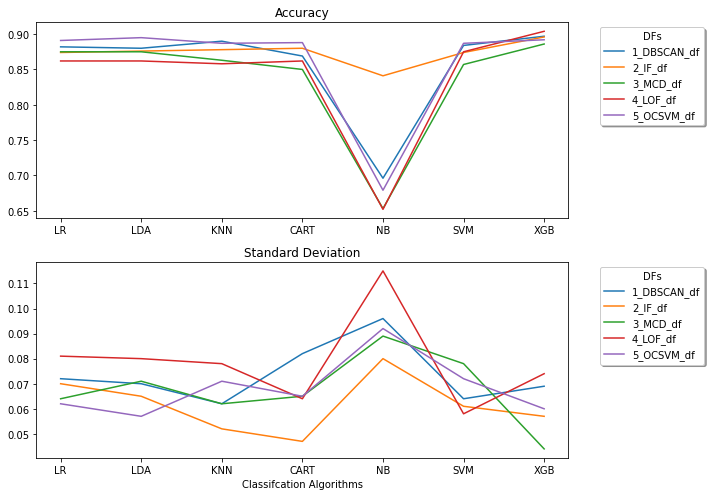

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='DFs', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='DFs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR      0.891
LDA     0.895
KNN     0.890
CART    0.888
NB      0.841
SVM     0.887
XGB     0.904
dtype: float64

In [ ]:
classification_comparison.T['CART']

DFs          values
1_DBSCAN_df  Acc       0.869
             SD        0.082
2_IF_df      Acc       0.880
             SD        0.047
3_MCD_df     Acc       0.850
             SD        0.065
4_LOF_df     Acc       0.862
             SD        0.064
5_OCSVM_df   Acc       0.888
             SD        0.065
Name: CART, dtype: float64

In [ ]:
classification_comparison.T['XGB']

DFs          values
1_DBSCAN_df  Acc       0.897
             SD        0.069
2_IF_df      Acc       0.896
             SD        0.057
3_MCD_df     Acc       0.886
             SD        0.044
4_LOF_df     Acc       0.904
             SD        0.074
5_OCSVM_df   Acc       0.892
             SD        0.060
Name: XGB, dtype: float64

In [ ]:
Outlier=classification_comparison.T.max()

In [ ]:
methods_comparison['Outlier']= Outlier
methods_comparison

,FIll_NaN,Add_F,Outlier
LR,0.786,0.765,0.891
LDA,0.790,0.767,0.895
KNN,0.817,0.757,0.890
CART,0.880,0.724,0.888
NB,0.780,0.746,0.841
SVM,0.850,0.760,0.887
XGB,0.889,0.785,0.904


## Selected Outlier Algorithm DF  

The best Outlier Algorithm is Local Outlier Factor, so it performed on the data.

In [ ]:
df= Local_Outlier_Factor_df

In [ ]:
df['class'].value_counts()

0    456
1    240
Name: class, dtype: int64

# **4.** Feature Selection Methods Comparison

## **1.** Removing features with low variance

**VarianceThreshold** is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.*italicised text*

In [ ]:
df.var().nlargest(20)

insu              6739.204056
plas               882.869127
age                129.165945
pres_mm            118.224352
skin_mm             64.182265
BMI                 42.363108
preg                11.016919
Normal               0.239938
Obese                0.236796
diabetic_p           0.235070
class                0.226247
pre_diabetic_p       0.220590
diabetic             0.207492
Normal_p             0.189909
Overweight           0.178068
Healthy_weight       0.104085
DPF                  0.100794
pre_diabetic         0.084791
Underweight          0.015577
dtype: float64

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
print(all_inputs.shape)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold= 0.104085)
all_inputs = sel.fit_transform(all_inputs)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

(696, 18)
(696, 14)
LR, 0.862037037037037, 0.06597345014640185))
LDA, 0.8618945868945869, 0.07555832044504261))
KNN, 0.8582621082621082, 0.0759855017679339))
CART, 0.8413105413105415, 0.07110445627784064))
NB, 0.8447293447293449, 0.06945960094664742))
SVM, 0.8773504273504272, 0.08218138723352486))
XGB, 0.8984330484330485, 0.06469354046681688))


Univariate Feature Selection

## **2.** UFS SelectKBest Select K Best
it removes all but the highest scoring features

In [ ]:
all_inputs = df[df.columns[0:-1]].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
print(all_inputs.shape)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

all_inputs = SelectKBest(chi2, k=15).fit_transform(all_inputs, all_labels)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

(696, 18)
(696, 15)
LR, 0.8619658119658119, 0.06138411185508111))
LDA, 0.8734330484330485, 0.06463105191758405))
KNN, 0.8560541310541311, 0.07311658592755686))
CART, 0.861894586894587, 0.06727278674035306))
NB, 0.6435185185185184, 0.08472835202709286))
SVM, 0.8657407407407408, 0.07563804110411428))
XGB, 0.9041310541310541, 0.06387280762652076))


## **3.** `UFS `SelectFpr` False Positive Rate test.
Filter: Select the p values below alpha based on a FPR test. a smaller p-value bears more significance as it can tell you that the hypothesis may not explain the observation fairly. If one or more of these probabilities turn out to be less than or equal to α, the level of significance, we reject the null hypothesis. For a true null hypothesis, p can take on any value between 0 and 1 with equal likeliness. For a true alternative hypothesis, p-values likely fall closer to 0.

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
from sklearn.feature_selection import SelectFpr, chi2
all_inputs = SelectFpr(chi2, alpha= 0.09
                       ).fit_transform(all_inputs, all_labels)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

(696, 16)
LR, 0.8677350427350428, 0.05641326900643618))
LDA, 0.8733618233618234, 0.06583277504291998))
KNN, 0.8447293447293449, 0.06729619733314672))
CART, 0.8527065527065527, 0.07052418683031295))
NB, 0.6684472934472934, 0.08571531178496568))
SVM, 0.8753561253561255, 0.07497872415709027))
XGB, 0.8983618233618234, 0.06592114099112054))


## **4.** Feature selection using SelectFromModel
### L1-based feature selection
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification:

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=.09 , penalty="l1", dual=False).fit(all_inputs, all_labels)
model = SelectFromModel(lsvc, prefit=True)
all_inputs = model.transform(all_inputs)
print(all_inputs.shape)

from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

(696, 14)
LR, 0.8716524216524217, 0.057349054491092656))
LDA, 0.8753561253561255, 0.05958861601904569))
KNN, 0.8657407407407408, 0.06845151790492156))
CART, 0.8467948717948717, 0.06182643886679986))
NB, 0.8504985754985755, 0.07195561951720005))
SVM, 0.865883190883191, 0.07546399654292588))
XGB, 0.9061253561253562, 0.05633700530500054))


## **5.** Sequential Feature Selection 
(Selecting features based on importance)
The features with the highest absolute coef_ value are considered the most important. 

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
all_inputs.shape

(696, 18)

Feature importance from coefficients

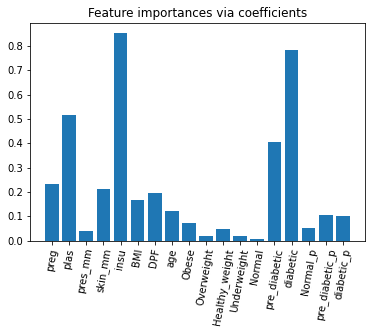

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)

lasso = LassoCV().fit(all_inputs, all_labels)
importance = np.abs(lasso.coef_)
feature_names = np.array(all_labels)
plt.bar(height=importance, x=df.columns[0:-1])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
np.sort(importance)

array([0.00516833, 0.01704968, 0.01878721, 0.03886262, 0.04583879,
       0.05275003, 0.0706723 , 0.10114942, 0.10380875, 0.12037679,
       0.1681799 , 0.19411578, 0.21222111, 0.23328783, 0.40594585,
       0.51628021, 0.78462425, 0.85159204])

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
print(all_inputs.shape)

from sklearn.feature_selection import SelectFromModel

threshold = 0.03886262

sfm = SelectFromModel(lasso, threshold=threshold).fit(all_inputs, all_labels)
selected_Features = df.columns[:-1][sfm.get_support()]
print("Features selected by SelectFromModel: ",
      f"{df.columns[0:-1][sfm.get_support()]}")


all_inputs = df[selected_Features].values
all_labels = df['class'].values
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

(696, 18)
Features selected by SelectFromModel:  Index(['preg', 'plas', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'Obese',
       'Healthy_weight', 'pre_diabetic', 'diabetic', 'Normal_p',
       'pre_diabetic_p', 'diabetic_p'],
      dtype='object')
(696, 14)
LR, 0.8735042735042736, 0.05453552591347405))
LDA, 0.8752849002849004, 0.06089218750812922))
KNN, 0.8428062678062679, 0.06207995349260721))
CART, 0.8544159544159544, 0.061490959824290425))
NB, 0.8141737891737891, 0.08181584589396765))
SVM, 0.8772079772079773, 0.07476067936357167))
XGB, 0.9061253561253559, 0.05890429657420025))


##  **6.** Principal Component Analysis

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(696, 18)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 12)
pca.fit(all_inputs)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_)

[6.99890877e+03 6.54746066e+02 1.52460758e+02 9.32832577e+01
 6.02073986e+01 2.07172485e+01 7.41590680e+00 3.10281425e-01
 2.16565656e-01 1.61184212e-01 1.22365951e-01 9.54000208e-02]


In [ ]:
all_inputs = pca.transform(all_inputs)
all_inputs.shape
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_6 = []
names = []
seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_6 = cross_val_score(model, X_train, y_train, cv=kfold,          scoring='accuracy')
    results_6.append(cv_results_6)
    names.append(name)
    print(f"{name}, {cv_results_6.mean()}, {cv_results_6.std()}))")

LR, 0.8620370370370372, 0.054964854020312))
LDA, 0.8619658119658121, 0.06498115844858557))
KNN, 0.8619658119658121, 0.0725124397045091))
CART, 0.817877492877493, 0.09005764588838602))
NB, 0.8486467236467238, 0.0670679642257839))
SVM, 0.8715099715099717, 0.07539045098468716))
XGB, 0.8563390313390314, 0.08044621919946748))


## Classification Comparison of Feature Selection Methods

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_6)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_6']= df_mean
classification_comparison['sd_6']= df_sd

In [ ]:
values= ['Acc', 'SD']

In [ ]:
FS_Methods=['1_RFLVar', '2_UFSKBest','3_UFSFpr',
     '4_FSU', '5_SFS', '6_PCA']

In [ ]:
idx = pd.MultiIndex.from_product([FS_Methods, values],
                                 names=['FS_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

FS_Methods 1_RFLVar         2_UFSKBest          ...   5_SFS           6_PCA        
values          Acc      SD        Acc      SD  ...     Acc      SD     Acc      SD
LR           0.8620  0.0677     0.8620  0.0630  ...  0.8735  0.0560  0.8620  0.0564
LDA          0.8619  0.0775     0.8734  0.0663  ...  0.8753  0.0625  0.8620  0.0667
KNN          0.8583  0.0780     0.8561  0.0750  ...  0.8428  0.0637  0.8620  0.0744
CART         0.8413  0.0730     0.8619  0.0690  ...  0.8544  0.0631  0.8179  0.0924
NB           0.8447  0.0713     0.6435  0.0869  ...  0.8142  0.0839  0.8486  0.0688
SVM          0.8774  0.0843     0.8657  0.0776  ...  0.8772  0.0767  0.8715  0.0773
XGB          0.8984  0.0664     0.9041  0.0655  ...  0.9061  0.0604  0.8563  0.0825

[7 rows x 12 columns]

In [ ]:
classification_comparison.to_csv('Classification Comparison of Feature Selection Methods.csv', index= False)

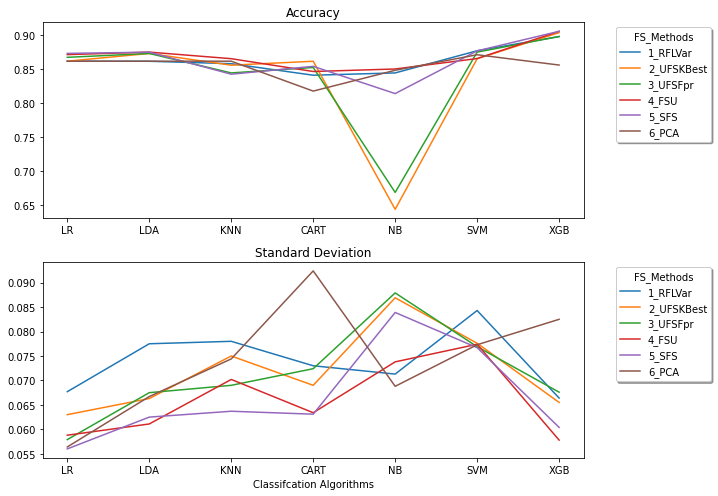

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR      0.8735
LDA     0.8754
KNN     0.8657
CART    0.8619
NB      0.8505
SVM     0.8774
XGB     0.9061
dtype: float64

In [ ]:
Feature =classification_comparison.T.max()

In [ ]:
classification_comparison.T['XGB']

FS_Methods  values
1_RFLVar    Acc       0.8984
            SD        0.0664
2_UFSKBest  Acc       0.9041
            SD        0.0655
3_UFSFpr    Acc       0.8984
            SD        0.0676
4_FSU       Acc       0.9061
            SD        0.0578
5_SFS       Acc       0.9061
            SD        0.0604
6_PCA       Acc       0.8563
            SD        0.0825
Name: XGB, dtype: float64

In [ ]:
classification_comparison.T['CART']

FS_Methods  values
1_RFLVar    Acc       0.8413
            SD        0.0730
2_UFSKBest  Acc       0.8619
            SD        0.0690
3_UFSFpr    Acc       0.8527
            SD        0.0724
4_FSU       Acc       0.8468
            SD        0.0634
5_SFS       Acc       0.8544
            SD        0.0631
6_PCA       Acc       0.8179
            SD        0.0924
Name: CART, dtype: float64

In [ ]:
methods_comparison['Feature']= Feature
methods_comparison

,FIll_NaN,Add_F,Outlier,Feature
LR,0.786,0.765,0.891,0.8735
LDA,0.790,0.767,0.895,0.8754
KNN,0.817,0.757,0.890,0.8657
CART,0.880,0.724,0.888,0.8619
NB,0.780,0.746,0.841,0.8505
SVM,0.850,0.760,0.887,0.8774
XGB,0.889,0.785,0.904,0.9061


The max accuracy was by using Select From Model

##  Selected Feature

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=.09 , penalty="l1", dual=False).fit(all_inputs, all_labels)
model = SelectFromModel(lsvc, prefit=True)
all_inputs = model.transform(all_inputs)
print(all_inputs.shape)

from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

(696, 14)
LR, 0.8716524216524217, 0.057349054491092656))
LDA, 0.8753561253561255, 0.05958861601904569))
KNN, 0.8657407407407408, 0.06845151790492156))
CART, 0.8467948717948717, 0.06182643886679986))
NB, 0.8504985754985755, 0.07195561951720005))
SVM, 0.865883190883191, 0.07546399654292588))
XGB, 0.9061253561253562, 0.05633700530500054))


In [ ]:
df.shape

(696, 15)

# **5.** Imbalanced Correction Methods

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    456
1    240
Name: class, dtype: int64

In [ ]:
all_inputs.shape

(696, 14)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(all_labels), all_labels)
print(class_weights)

[0.76315789 1.45      ]


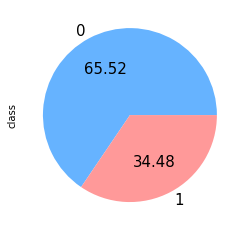

In [ ]:
pd.value_counts(df['class']).plot(kind='pie', autopct='%.2f',fontsize=15, colors= ['#66b3ff','#ff9999'])

## **1.** SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    456
1    240
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    456
0    456
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LR, 0.864327731092437, 0.07061647844343612))
LDA, 0.852563025210084, 0.07573870608521982))
KNN, 0.8803781512605042, 0.0689722359962584))
CART, 0.8847058823529412, 0.04496434416635351))
NB, 0.8264285714285714, 0.0796771941301821))
SVM, 0.8571428571428571, 0.08050885058768605))
XGB, 0.9139075630252099, 0.05052403517213921))


## **2.** Border line SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    456
1    240
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    456
0    456
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LR, 0.8405882352941176, 0.06742518025605315))
LDA, 0.8333613445378152, 0.062351072476471266))
KNN, 0.8538655462184874, 0.07252003465854545))
CART, 0.8775630252100839, 0.0659260166576104))
NB, 0.8189495798319328, 0.06368865097025407))
SVM, 0.8744117647058822, 0.05982666568734233))
XGB, 0.9270588235294115, 0.03943281228312503))


## **3.** SVM SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    456
1    240
dtype: int64

In [ ]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1    456
0    456
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

LR, 0.8568487394957984, 0.0632914683906705))
LDA, 0.8466386554621849, 0.052723642715918145))
KNN, 0.8670168067226891, 0.05101184696196572))
CART, 0.8876050420168067, 0.04973474942606156))
NB, 0.8190336134453782, 0.07572276088325611))
SVM, 0.8656302521008403, 0.06492808078200309))
XGB, 0.9227310924369746, 0.049563075789801826))


## **4.** Adaptive Synthetic Sampling (ADASYN)

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    456
1    240
dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN(random_state=42)
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    463
0    456
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

LR, 0.8057142857142857, 0.060236100684876004))
LDA, 0.7881512605042017, 0.05399177647682829))
KNN, 0.8735714285714286, 0.059343128313607926))
CART, 0.8809663865546218, 0.04492795274422015))
NB, 0.7763025210084035, 0.0543214753298728))
SVM, 0.8603361344537817, 0.05325013223997295))
XGB, 0.9173949579831933, 0.04475537476515333))


## **5.** Random Over Sampler

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    456
1    240
dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    456
0    456
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

LR, 0.8773949579831932, 0.05463988066938839))
LDA, 0.8729831932773108, 0.056153241836470545))
KNN, 0.8641596638655462, 0.06511888006068071))
CART, 0.9124369747899159, 0.04493213739132524))
NB, 0.8277731092436975, 0.06759065188336488))
SVM, 0.8788655462184873, 0.05422237569869624))
XGB, 0.9372268907563024, 0.05165921533119705))


## **6.** Random Under Sampler

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    456
1    240
dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
all_inputs, all_labels = undersample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    240
0    240
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler( )
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_6 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_6 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_6.append(cv_results_6)
    names.append(name)
    print(f"{name}, {cv_results_6.mean()}, {cv_results_6.std()}))")

LR, 0.8388888888888889, 0.08940820521906158))
LDA, 0.8388888888888889, 0.09606453592105879))
KNN, 0.8194444444444444, 0.08216777476527243))
CART, 0.8416666666666668, 0.09005313931915183))
NB, 0.8111111111111111, 0.09196080754026026))
SVM, 0.8472222222222223, 0.07632573146685602))
XGB, 0.8694444444444445, 0.07301910793386061))


## **7.** Combining Random Oversampling and Undersampling

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    456
1    240
dtype: int64

In [ ]:
under = RandomUnderSampler(sampling_strategy=.7)
all_inputs, all_labels = under.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0    342
1    240
dtype: int64

In [ ]:
over = RandomOverSampler()
all_inputs, all_labels = over.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    342
0    342
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_7 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_7 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_7.append(cv_results_7)
    names.append(name)
    print(f"{name}, {cv_results_7.mean()}, {cv_results_7.std()}))")

LR, 0.8576923076923076, 0.07534300264349224))
LDA, 0.8537692307692308, 0.07913508037997789))
KNN, 0.8261538461538462, 0.07429670248402684))
CART, 0.8772307692307691, 0.06310055842362079))
NB, 0.8206153846153846, 0.08142139637086955))
SVM, 0.8516923076923077, 0.07258604361590905))
XGB, 0.8944615384615385, 0.07443896669966349))


## Classification Comparison of Feature Selection Methods

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_6)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_6']= df_mean
classification_comparison['sd_6']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_7)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_7']= df_mean
classification_comparison['sd_7']= df_sd

In [ ]:
values= ['Acc', 'SD']

In [ ]:
FS_Methods=['1_SMOTE', '2_BL-SMOTE','3_SVM-SMOTE',
     '4_ADASYN', '5_ROS', '6_RUS', '7_CR(O-U)S']

In [ ]:
idx = pd.MultiIndex.from_product([FS_Methods, values],
                                 names=['FS_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

FS_Methods 1_SMOTE         2_BL-SMOTE  ...   6_RUS 7_CR(O-U)S        
values         Acc      SD        Acc  ...      SD        Acc      SD
LR          0.8643  0.0725     0.8406  ...  0.0917     0.8577  0.0773
LDA         0.8526  0.0777     0.8334  ...  0.0986     0.8538  0.0812
KNN         0.8804  0.0708     0.8539  ...  0.0843     0.8262  0.0762
CART        0.8847  0.0461     0.8776  ...  0.0924     0.8772  0.0647
NB          0.8264  0.0817     0.8189  ...  0.0943     0.8206  0.0835
SVM         0.8571  0.0826     0.8744  ...  0.0783     0.8517  0.0745
XGB         0.9139  0.0518     0.9271  ...  0.0749     0.8945  0.0764

[7 rows x 14 columns]

In [ ]:
classification_comparison.to_csv('Classification Comparison of Feature Selection Methods.csv', index= False)

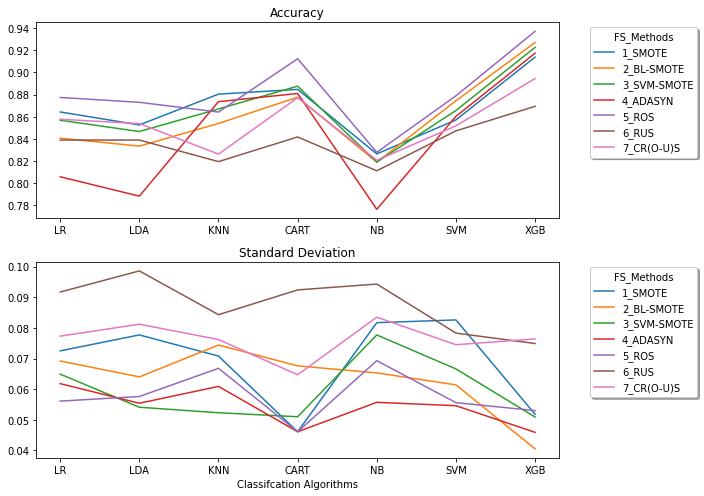

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR      0.8774
LDA     0.8730
KNN     0.8804
CART    0.9124
NB      0.8278
SVM     0.8789
XGB     0.9372
dtype: float64

In [ ]:
Imbalance= classification_comparison.T.max()

In [ ]:
classification_comparison.T['CART']

FS_Methods   values
1_SMOTE      Acc       0.8847
             SD        0.0461
2_BL-SMOTE   Acc       0.8776
             SD        0.0676
3_SVM-SMOTE  Acc       0.8876
             SD        0.0510
4_ADASYN     Acc       0.8810
             SD        0.0461
5_ROS        Acc       0.9124
             SD        0.0461
6_RUS        Acc       0.8417
             SD        0.0924
7_CR(O-U)S   Acc       0.8772
             SD        0.0647
Name: CART, dtype: float64

In [ ]:
classification_comparison.T['XGB']

FS_Methods   values
1_SMOTE      Acc       0.9139
             SD        0.0518
2_BL-SMOTE   Acc       0.9271
             SD        0.0405
3_SVM-SMOTE  Acc       0.9227
             SD        0.0509
4_ADASYN     Acc       0.9174
             SD        0.0459
5_ROS        Acc       0.9372
             SD        0.0530
6_RUS        Acc       0.8694
             SD        0.0749
7_CR(O-U)S   Acc       0.8945
             SD        0.0764
Name: XGB, dtype: float64

In [ ]:
methods_comparison['Imbalance']= Imbalance
methods_comparison

,FIll_NaN,Add_F,Outlier,Feature,Imbalance
LR,0.786,0.765,0.891,0.8735,0.8774
LDA,0.790,0.767,0.895,0.8754,0.8730
KNN,0.817,0.757,0.890,0.8657,0.8804
CART,0.880,0.724,0.888,0.8619,0.9124
NB,0.780,0.746,0.841,0.8505,0.8278
SVM,0.850,0.760,0.887,0.8774,0.8789
XGB,0.889,0.785,0.904,0.9061,0.9372


## Selected imbalance mehods

The max accuracy was by using Random Over Sampler

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
all_inputs.shape

(696, 14)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    456
0    456
dtype: int64

# Step 5:  Building the classifier

## **1.** XGBoost Classifier

### Hyperparameter Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=4, cv=skf.split(all_inputs,all_labels),
                                   verbose=3, random_state=1001 )
random_search.fit(all_inputs,all_labels) 

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    6.6s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fcad356cba0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logist...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

 Best normalized gini score for 3-fold search with 5 parameter combinations:
0.92321675900277

 Best hyperparameters:
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}


### Confusion Matrix & Tuning

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
                    learning_rate=0.02, max_delta_step=0, max_depth=5,
                    min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
                    nthread=1, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=0.6, verbosity=1)
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.9342105263157895
--------------------------------------------------------
------- Confusion Matrix --------

[[100   6]
 [  9 113]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       106
           1       0.95      0.93      0.94       122

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228

--------------------------------------------------------


In [ ]:
XGB=[]
XGB.append(0.934)


### Preprocessing Methods Comparison


1.   Standard Scaler
2.   Min Max Scaler
3.   Max Abs Scaler
4. Robust Scaler
5. Power Transformer
6. Quantile Transformer (uniform output)
7. Quantile Transformer (Gaussian output)
8. Normalizer




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
scalers = []
scalers.append(('1.SS', StandardScaler()))
scalers.append(('2.MMS', MinMaxScaler()))
scalers.append(('3.MAS', MaxAbsScaler()))
scalers.append(('4.RPS', RobustScaler()))
scalers.append(('5.PT', PowerTransformer()))
scalers.append(('6.QTG', QuantileTransformer()))
scalers.append(('7.QTN', QuantileTransformer(output_distribution='normal')))
scalers.append(('8.NRM', Normalizer()))


In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values

results_1 = []; names = []; seed=42
for name, scaler in scalers:
   
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    model = cls
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

1.SS, 0.925546218487395, 0.04157617695531443))
2.MMS, 0.927016806722689, 0.040529364721187754))
3.MAS, 0.927016806722689, 0.040529364721187754))
4.RPS, 0.925546218487395, 0.04157617695531443))
5.PT, 0.927016806722689, 0.040529364721187754))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (684). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


6.QTG, 0.9299579831932773, 0.039297081894647666))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (684). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


7.QTN, 0.9299579831932773, 0.039297081894647666))
8.NRM, 0.9197478991596638, 0.05022616738997399))


In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd

classification_comparison

,Accuracy,sd
1.SS,0.9255,0.0427
2.MMS,0.9270,0.0416
3.MAS,0.9270,0.0416
4.RPS,0.9255,0.0427
5.PT,0.9270,0.0416
6.QTG,0.9300,0.0403
7.QTN,0.9300,0.0403
8.NRM,0.9197,0.0515


### Cross-validation

''

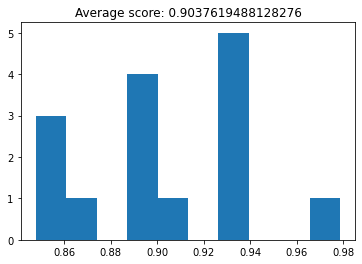

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
XGB.append(np.mean(cv_scores).round(3))
XGB

[0.934, 0.904]

## **2.** Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

ETC = ExtraTreesClassifier(max_features=13,n_estimators= 520)

parameter_grid = {
                  
                  'max_leaf_nodes' : [5000,700]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(ETC,
                           param_grid=parameter_grid,
                           cv=cross_validation, n_jobs=4, )

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8907660455486542
Best parameters: {'max_leaf_nodes': 700}


### Hyperparameter Randomized Search CV

### Confusion Matrix

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = ExtraTreesClassifier(n_estimators=9, max_features=13,
                           criterion= 'entropy', 
                           min_samples_split=3,
                           max_samples= .5, n_jobs=100)
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8735632183908046
--------------------------------------------------------
------- Confusion Matrix --------

[[101   9]
 [ 13  51]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       110
           1       0.85      0.80      0.82        64

    accuracy                           0.87       174
   macro avg       0.87      0.86      0.86       174
weighted avg       0.87      0.87      0.87       174

--------------------------------------------------------


In [ ]:
ETsC=[]
ETsC.append(0.873)


### Preprocessing Methods Comparison


1.   Standard Scaler
2.   Min Max Scaler
3.   Max Abs Scaler
4. Robust Scaler
5. Power Transformer
6. Quantile Transformer (uniform output)
7. Quantile Transformer (Gaussian output)
8. Normalizer




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
scalers = []
scalers.append(('1.SS', StandardScaler()))
scalers.append(('2.MMS', MinMaxScaler()))
scalers.append(('3.MAS', MaxAbsScaler()))
scalers.append(('4.RPS', RobustScaler()))
scalers.append(('5.PT', PowerTransformer()))
scalers.append(('6.QTG', QuantileTransformer()))
scalers.append(('7.QTN', QuantileTransformer(output_distribution='normal')))
scalers.append(('8.NRM', Normalizer()))


In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values

results_1 = []; names = []; seed=42
for name, scaler in scalers:
   
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    model = cls
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

1.SS, 0.8562678062678064, 0.06428574649529842))
2.MMS, 0.8792735042735043, 0.057460359946266484))
3.MAS, 0.8792735042735043, 0.06472454657741178))
4.RPS, 0.8907407407407406, 0.06121230307312289))
5.PT, 0.8619658119658121, 0.061471651767881295))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (522). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


6.QTG, 0.8735042735042736, 0.07213746100838564))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (522). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


7.QTN, 0.8698005698005697, 0.07904943336596147))
8.NRM, 0.8619658119658119, 0.06383276556156207))


In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd

classification_comparison

,Accuracy,sd
1.SS,0.8563,0.0660
2.MMS,0.8793,0.0590
3.MAS,0.8793,0.0664
4.RPS,0.8907,0.0628
5.PT,0.8620,0.0631
6.QTG,0.8735,0.0740
7.QTN,0.8698,0.0811
8.NRM,0.8620,0.0655


### Cross-validation

''

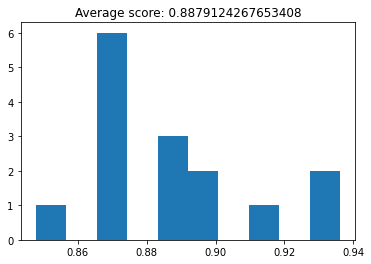

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
ETsC.append(np.mean(cv_scores).round(3))
ETsC

[0.873, 0.888]

## **3.** LGBM Classifier

### Confusion Matrix & Tuning

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

rs_params = {

        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),

        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)

}

lgb = LGBMClassifier()

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(lgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=4, cv=skf.split(all_inputs,all_labels),
                                   verbose=3, random_state=1001 )
random_search.fit(all_inputs,all_labels) 


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    2.9s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fcad3744678>,
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            ran...
                                            subsample=1.0,
                                            subsample_for_bin=200000,
                    

In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 Best estimator:
LGBMClassifier(boosting_type='gbdt', ccp_alpha=0.5, class_weight=None,
               colsample_bytree=0.6, importance_type='split', learning_rate=0.1,
               max_depth=3, min_child_samples=20, min_child_weight=0.001,
               min_samples_split=3, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=5)

 Best normalized gini score for 3-fold search with 5 parameter combinations:
0.9081688596491226

 Best hyperparameters:
{'verbose': 5, 'min_samples_split': 3, 'max_depth': 3, 'colsample_bytree': 0.6, 'ccp_alpha': 0.5}


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = LGBMClassifier(num_leaves= 55,
                     learning_rate  = .3,
                     subsample_for_bin  = 233,
                     importance_type  ='gain')
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.9022988505747126
--------------------------------------------------------
------- Confusion Matrix --------

[[102   8]
 [  9  55]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       110
           1       0.87      0.86      0.87        64

    accuracy                           0.90       174
   macro avg       0.90      0.89      0.89       174
weighted avg       0.90      0.90      0.90       174

--------------------------------------------------------


In [ ]:
LGBM=[]
LGBM.append(0.902)

### Cross-validation

''

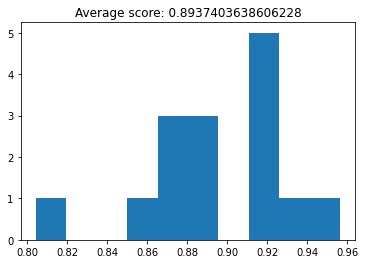

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
LGBM.append(np.mean(cv_scores).round(3))
LGBM

[0.902, 0.894]

## **4.** Decision Tree Classifier

### Confusion Matrix & Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': list(range(21,55,2)),
                  'max_features': list(range(1,14))}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8863975155279503
Best parameters: {'criterion': 'gini', 'max_depth': 47, 'max_features': 11, 'splitter': 'best'}


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = DecisionTreeClassifier(criterion='entropy',
                             max_depth=21,
                             max_features=11,
                             splitter='best')
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.9022988505747126
--------------------------------------------------------
------- Confusion Matrix --------

[[102   8]
 [  9  55]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       110
           1       0.87      0.86      0.87        64

    accuracy                           0.90       174
   macro avg       0.90      0.89      0.89       174
weighted avg       0.90      0.90      0.90       174

--------------------------------------------------------


In [ ]:
DTC=[]
DTC.append(0.902)

### Cross-validation

''

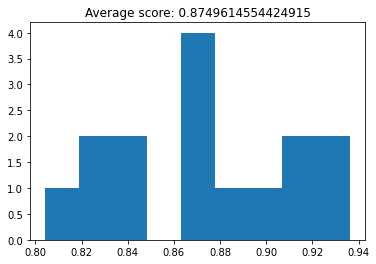

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores,bins=9, stacked=True)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
DTC.append(np.mean(cv_scores).round(3))
DTC

[0.902, 0.875]

## Comparison

In [ ]:
compile= pd.DataFrame(ETsC, index=['Acc','Val_acc'], columns=['ETsC'])
compile['XGB']= XGB
compile['LGBM']= LGBM
compile['DTC']= DTC
compile= compile.T
compile

,Acc,Val_acc
ETsC,0.873,0.888
XGB,0.934,0.904
LGBM,0.902,0.894
DTC,0.902,0.875


# Selected model

''

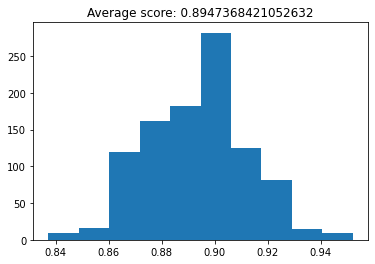

In [ ]:
cls = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
                    learning_rate=0.02, max_delta_step=0, max_depth=5,
                    min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
                    nthread=1, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=0.6, verbosity=1)
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30)
    
    cls.fit(training_inputs, training_classes)
    classifier_accuracy = cls.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
plt.title('Average score: {}'.format(np.mean(classifier_accuracy)))

;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


''

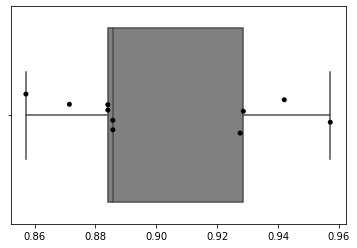

In [ ]:
dt_scores = cross_val_score(cls, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores, color='gray', )
sb.stripplot(dt_scores, jitter=True, color='black')
;

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


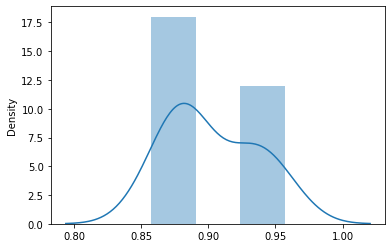

In [ ]:
sb.distplot(dt_scores)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


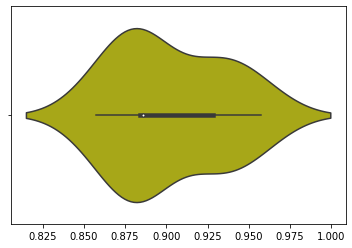

In [ ]:
sb.violinplot(dt_scores, color='y')

# Using Neural Networks

In [ ]:
import tensorflow as tf
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, 
                                                      test_size=0.2, random_state=1,
                                                      stratify= all_labels )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(14, activation='relu', input_shape=[14]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.01)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_model()

In [ ]:
del model

In [ ]:
Epochs = 75
history = model.fit(X_train, y_train,epochs=Epochs,
                    validation_split=0.2,)

Epoch 1/75
14/14 [==============================] - 1s 15ms/step - loss: 0.7363 - accuracy: 0.5698 - val_loss: 0.6165 - val_accuracy: 0.8036
Epoch 2/75
14/14 [==============================] - 0s 4ms/step - loss: 0.5889 - accuracy: 0.8301 - val_loss: 0.5116 - val_accuracy: 0.8571
Epoch 3/75
14/14 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.8499 - val_loss: 0.4022 - val_accuracy: 0.8661
Epoch 4/75
14/14 [==============================] - 0s 4ms/step - loss: 0.3221 - accuracy: 0.8853 - val_loss: 0.3796 - val_accuracy: 0.8839
Epoch 5/75
14/14 [==============================] - 0s 4ms/step - loss: 0.3168 - accuracy: 0.8904 - val_loss: 0.3835 - val_accuracy: 0.8571
Epoch 6/75
14/14 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.8838 - val_loss: 0.3870 - val_accuracy: 0.8571
Epoch 7/75
14/14 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.8998 - val_loss: 0.4030 - val_accuracy: 0.8661
Epoch 8/75
14/14 [=

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
70,0.083450,0.963964,0.899368,0.830357,70
71,0.080079,0.970721,0.917036,0.848214,71
72,0.079431,0.968468,0.881565,0.848214,72
73,0.072801,0.970721,0.983648,0.830357,73
74,0.081346,0.961712,0.927632,0.830357,74


In [ ]:
acc = (hist['accuracy'].tail().sum())*100/5 
val_acc = (hist['val_accuracy'].tail().sum())*100/5 

print("Training Accuracy = {}% and Validation Accuracy= {}%".format(acc,val_acc))

Training Accuracy = 96.71171188354492% and Validation Accuracy= 83.7499988079071%


In [ ]:
y_pred = model.predict_classes(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.7571428571428571
--------------------------------------------------------
------- Confusion Matrix --------

[[70 22]
 [12 36]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        92
           1       0.62      0.75      0.68        48

    accuracy                           0.76       140
   macro avg       0.74      0.76      0.74       140
weighted avg       0.77      0.76      0.76       140

--------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Conclusion
>Best accuracy was by using **XGboost Classifier** with 93.4% accuracy, and an excellent validation accuracy (89.5 %).
The accuracy achieved by using: 
1. Forward filling the NaN, 
2. without using the extracted feature, 
3. DBSCAN Density-Based Spatial Clustering of Applications for outlier detection,
4. Random over sampler to balance the classes


# Step 6:  Reproducibility

In [ ]:
!pip install watermark

In [ ]:
%load_ext watermark

In [ ]:
%watermark -a 'Hazim' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Hazim Tue Dec 29 2020 

CPython 3.6.9
IPython 5.5.0

numpy 1.19.4
pandas 1.1.5
sklearn 0.0
matplotlib 3.2.2
seaborn 0.11.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.112+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
